#                  CS4442/9542 Assignment 3：CNN for Image Classification

### Yilin Xie, 250722581 

# Introduction

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image for a total of 784 pixels, associated with a label from 10 classes. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see below), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

1.  Each row is a separate image
* Column 1 is the class label.
* Remaining columns are pixel numbers (784 total).
* Each value is the darkness of the pixel (1 to 255)

Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top 
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot 






## Install Packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

Using TensorFlow backend.


## Parameters

In [2]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 1234
#Model
NO_EPOCHS = 10
BATCH_SIZE = 128

## Import data

In [3]:
train_file = "../fashionmnist/fashion-mnist_train.csv"
test_file  = "../fashionmnist/fashion-mnist_test.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

## Explore the data

In [4]:
train_data.shape

(60000, 785)

In [5]:
test_data.shape

(10000, 785)

In [6]:
print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


In [10]:
#Gather pixel information for training data
X_train = train_data.iloc[:, 1:]

#Gather label information for training data
y_train = train_data.iloc[:,:1]
y_train_labels = train_data.iloc[:,:1]

#Gather pixel information for training data
X_test = test_data.iloc[:, 1:]

#Gather label information for training data
y_test = test_data.iloc[:,:1]
y_test_labels = test_data.iloc[:,:1]

#Reshape to 28x28 array
X_train = np.array(X_train, dtype = 'float32').reshape(60000,28,28,1)
y_train =  keras.utils.to_categorical(y_train)

#Reshape to 28x28 array
X_test = np.array(X_test, dtype = 'float32').reshape(10000,28,28,1)
y_test = keras.utils.to_categorical(y_test)

#Scale input
X_train /= 255
X_test /= 255

In [11]:
#Map numeric lables to fashion category
labels = {0 : "T-shirt/top", 
         1: "Trouser", 
         2: "Pullover", 
         3: "Dress", 
         4: "Coat",
         5: "Sandal", 
         6: "Shirt", 
         7: "Sneaker", 
         8: "Bag", 
         9: "Ankle Boot"}

In [24]:
def plot_sample_images(images,image_labels,n_samples = 9):
    for i in range(n_samples):
        plt.subplot(330 + 1 + i)
        #plt.figure()
        #plt.figsize=(5,5)

        sample_train_label_id = image_labels.label[i]
        sample_train_label = labels[sample_train_label_id]
        plt.imshow(X_train[i].reshape(28, 28),cmap="Greys_r")
        plt.title(sample_train_label)
        plt.axis('off')
        
    plt.show()

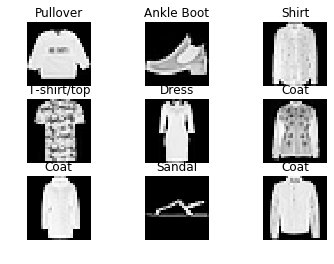

In [25]:
plot_sample_images(X_train,y_train_labels)

## 20 sample images from the train set

In [22]:
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(2)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(IMG_ROWS,IMG_COLS)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)

Total number of sample images to plot:  20


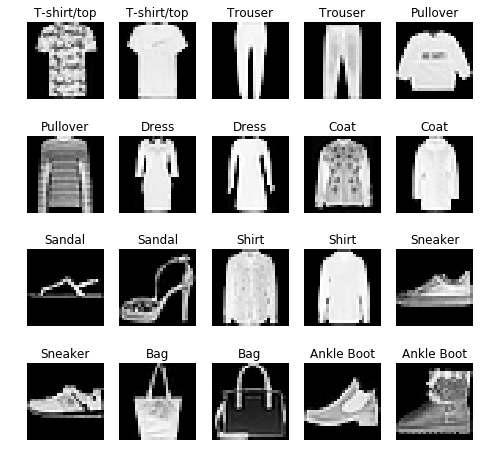

In [26]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Greys_r"):
    # Plot the sample images now
    f, ax = plt.subplots(4,5, figsize=(8,8))

    for i, img in enumerate(data_sample_images):
        ax[i//5, i%5].imshow(img, cmap=cmap)
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title(labels[data_sample_labels[i]])
    plt.show()    
    
plot_sample_images(train_sample_images,train_sample_labels, "Greys_r")

## 20 sample images from the test set

Total number of sample images to plot:  20


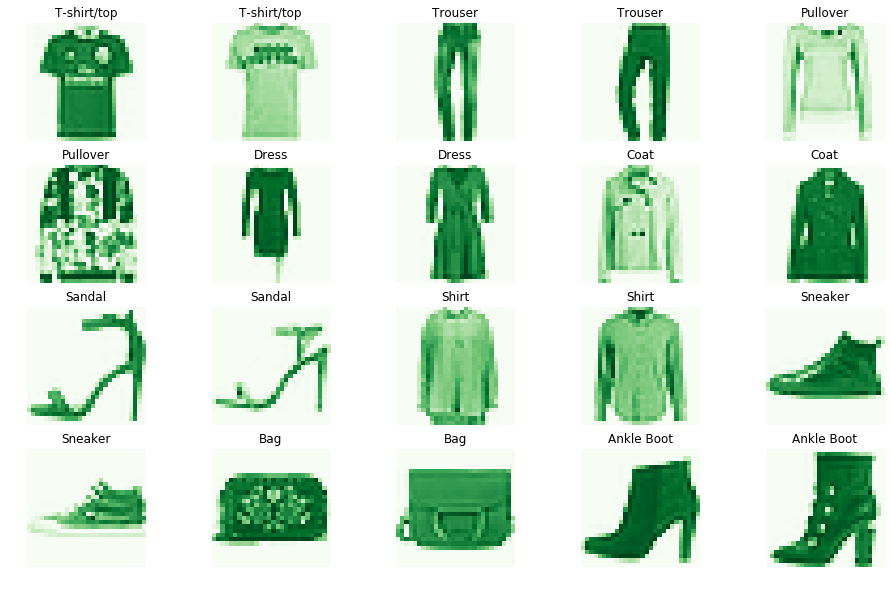

In [197]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels,"Greens")

## Data preprocessing - Reshape data
* We reshape the columns from 784 to (28,28). We also save label (target) feature as a separate vector.

In [203]:
# data preprocessing
def data_preprocessing(raw):
    out_y = keras.utils.to_categorical(raw.label)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [204]:
X_train, y_train = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

In [205]:
X_train.shape

(60000, 28, 28)

In [206]:
y_train.shape

(60000, 10)

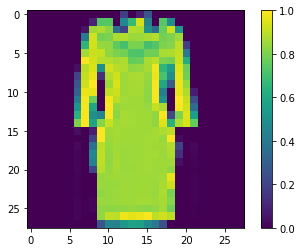

In [208]:
plt.figure()
plt.imshow(X_train[4])
plt.colorbar()
plt.grid(False)
plt.show()

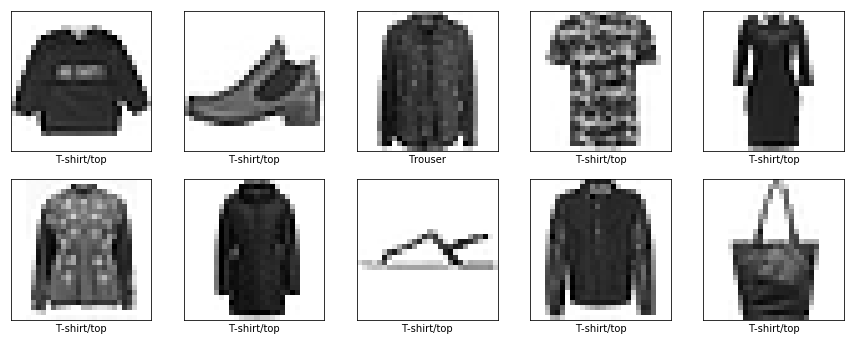

In [209]:
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(labels[y_train[0][i]])
plt.show()

## Data preprocessing - Feature Standardization & ZCA Whitening
It is also possible to standardize pixel values across the entire dataset. This is called feature standardization and mirrors the type of standardization often performed for each column in a tabular dataset.

A whitening transform of an image is a linear algebra operation that reduces the redundancy in the matrix of pixel images. Less redundancy in the image is intended to better highlight the structures and features in the image to the learning algorithm.

In [65]:
# packages
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering('th')

In [210]:
# Reshape data for standardization and whitening
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

### Feature Standardization

In [211]:
# feature standardization
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [212]:
# fit parameters from data
datagen.fit(X_train)
datagen.fit(X_test)

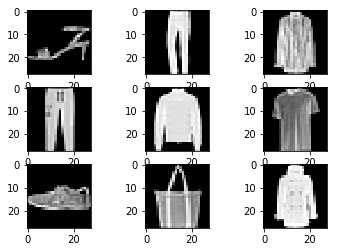

In [213]:
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=16):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break


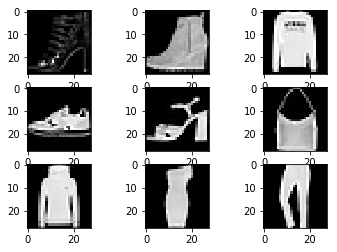

In [214]:
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_test, y_test, batch_size=12):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

##### Running this example you can see that the effect is different, seemingly darkening the background and outlining the clothes.

### ZCA Whitening

In [215]:
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)
datagen.fit(X_test)

/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:334: UserWarning:

This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.



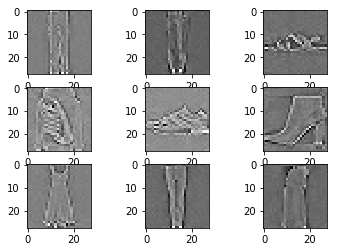

In [216]:
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=16):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

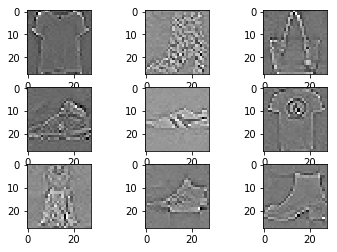

In [217]:
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_test, y_test, batch_size=12):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

In [218]:
# Reshape the data for the modeling
X_train = np.array(X_train, dtype = 'float32').reshape(60000,28,28,1)
X_test = np.array(X_test, dtype = 'float32').reshape(10000,28,28,1)

## Split the train set into training (80%) and validation (20%)

In [219]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [220]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


In [221]:
print("Fashion MNIST train -  rows:",y_train.shape[0]," columns:", y_train.shape[1])
print("Fashion MNIST valid -  rows:",y_val.shape[0]," columns:", y_val.shape[1])
print("Fashion MNIST test -  rows:",y_test.shape[0]," columns:", y_test.shape[1])

Fashion MNIST train -  rows: 48000  columns: 10
Fashion MNIST valid -  rows: 12000  columns: 10
Fashion MNIST test -  rows: 10000  columns: 10


## Build the models

### We will use a Sequential model:

* The Sequential model is a linear stack of layers. It can be first initialized and then we add layers using add method or we can add all layers at init stage. The layers added are as follows:
    * Conv2D is a 2D Convolutional layer (i.e. spatial convolution over images)
    * MaxPooling2D is a Max pooling operation for spatial data
    * Flatten. This layer Flattens the input. Does not affect the batch size. It is used without parameters
    * Dense. This layer is a regular fully-connected NN layer. It is used without parameters

### Model 1

In [184]:
# Model 1
model = Sequential()
# 1st layer
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS,1)))
# Add maxpooling
model.add(MaxPooling2D((2, 2)))

# 2nd layer
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [185]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 128)               0         
__________

In [186]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 39s 820us/sample - loss: 0.6456 - acc: 0.7684 - val_loss: 0.4717 - val_acc: 0.8240
Epoch 2/10
48000/48000 [==============================] - 41s 849us/sample - loss: 0.4285 - acc: 0.8434 - val_loss: 0.3947 - val_acc: 0.8525
Epoch 3/10
48000/48000 [==============================] - 42s 870us/sample - loss: 0.3693 - acc: 0.8644 - val_loss: 0.3617 - val_acc: 0.8717
Epoch 4/10
48000/48000 [==============================] - 41s 852us/sample - loss: 0.3361 - acc: 0.8768 - val_loss: 0.3483 - val_acc: 0.8683
Epoch 5/10
48000/48000 [==============================] - 41s 851us/sample - loss: 0.3065 - acc: 0.8879 - val_loss: 0.3296 - val_acc: 0.8794
Epoch 6/10
48000/48000 [==============================] - 41s 862us/sample - loss: 0.2832 - acc: 0.8953 - val_loss: 0.3384 - val_acc: 0.8708
Epoch 7/10
48000/48000 [==============================] - 41s 863us/sample - loss: 0.2678 - acc: 0.9008 

### Test prediction accuracy

In [187]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.28960205883979795
Test accuracy: 0.8947


In [188]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)
#get the indices to be plotted
y_true = test_data.iloc[:, 0]

p = predicted_classes[:10000]
y = y_true[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 8947
Incorrect predicted classes: 1053


### Model 2: Add Dropout layers to the model
We add several Dropout layers to the model to help avoiding overfitting.

In [179]:
# Model
model = Sequential()
# 1st layer
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))

# 2nd layer
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))

# 3rd layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))

# flatten
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [180]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 128)         73856     
__________

In [181]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 46s 957us/sample - loss: 0.8257 - acc: 0.6887 - val_loss: 0.5562 - val_acc: 0.8019
Epoch 2/10
48000/48000 [==============================] - 49s 1ms/sample - loss: 0.5567 - acc: 0.7960 - val_loss: 0.4654 - val_acc: 0.8294
Epoch 3/10
48000/48000 [==============================] - 48s 1ms/sample - loss: 0.4915 - acc: 0.8202 - val_loss: 0.4080 - val_acc: 0.8533
Epoch 4/10
48000/48000 [==============================] - 50s 1ms/sample - loss: 0.4476 - acc: 0.8375 - val_loss: 0.3660 - val_acc: 0.8662
Epoch 5/10
48000/48000 [==============================] - 48s 1ms/sample - loss: 0.4184 - acc: 0.8471 - val_loss: 0.3539 - val_acc: 0.8714
Epoch 6/10
48000/48000 [==============================] - 48s 998us/sample - loss: 0.3944 - acc: 0.8534 - val_loss: 0.3364 - val_acc: 0.8763
Epoch 7/10
48000/48000 [==============================] - 49s 1ms/sample - loss: 0.3766 - acc: 0.8622 - val_loss

### Test prediction accuracy

In [182]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.28687046656608584
Test accuracy: 0.897


In [183]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)
#get the indices to be plotted
y_true = test_data.iloc[:, 0]

p = predicted_classes[:10000]
y = y_true[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 8970
Incorrect predicted classes: 1030


# Conclusions

With a complex sequential model with multiple convolution layers and 10 epochs for the training, we obtained an accuracy 0.895 for test prediction. We retrained the model with Dropout layers to the model to reduce overfitting.
We confirmed the model got slight improvement and with the same number of epochs for the training we obtained with the new model an accuracy of 0.897 for test prediction. 